## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
model = build_mlp()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 193us/step - loss: 1.8646 - accuracy: 0.3331 - val_loss: 1.7456 - val_accuracy: 0.3756
Epoch 2/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.6488 - accuracy: 0.4167 - val_loss: 1.6621 - val_accuracy: 0.4027
Epoch 3/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.5584 - accuracy: 0.4485 - val_loss: 1.5144 - val_accuracy: 0.4622
Epoch 4/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.4934 - accuracy: 0.4712 - val_loss: 1.6730 - val_accuracy: 0.3973
Epoch 5/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.4467 - accuracy: 0.4877 - val_loss: 1.4337 - val_accuracy: 0.4898
Epoch 6/500
50000/50000 [==============================] - 11s 218us/step - loss: 1.3952 - accuracy: 0.5064 - val_loss: 1.6591 - val_accuracy: 0.4118
Epoch 7/500
50000/50000 [=============================

50000/50000 [==============================] - 10s 199us/step - loss: 0.3635 - accuracy: 0.8714 - val_loss: 2.1731 - val_accuracy: 0.5142
Epoch 56/500
50000/50000 [==============================] - 9s 186us/step - loss: 0.3393 - accuracy: 0.8809 - val_loss: 2.6362 - val_accuracy: 0.4715
Epoch 57/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.3297 - accuracy: 0.8828 - val_loss: 2.1757 - val_accuracy: 0.5279
Epoch 58/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.3131 - accuracy: 0.8895 - val_loss: 2.2308 - val_accuracy: 0.5222
Epoch 59/500
50000/50000 [==============================] - 9s 190us/step - loss: 0.3058 - accuracy: 0.8926 - val_loss: 2.2996 - val_accuracy: 0.5340
Epoch 60/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.3007 - accuracy: 0.8947 - val_loss: 2.2636 - val_accuracy: 0.5261
Epoch 61/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.2923 - accuracy: 0.8962 - va

50000/50000 [==============================] - 9s 182us/step - loss: 0.0952 - accuracy: 0.9658 - val_loss: 3.7734 - val_accuracy: 0.5337
Epoch 110/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0860 - accuracy: 0.9700 - val_loss: 3.6396 - val_accuracy: 0.5371
Epoch 111/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0867 - accuracy: 0.9699 - val_loss: 4.0066 - val_accuracy: 0.5200
Epoch 112/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.1077 - accuracy: 0.9618 - val_loss: 3.7450 - val_accuracy: 0.5327
Epoch 113/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0957 - accuracy: 0.9662 - val_loss: 3.8541 - val_accuracy: 0.5318
Epoch 114/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0666 - accuracy: 0.9768 - val_loss: 3.8646 - val_accuracy: 0.5371
Epoch 115/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0814 - accuracy: 0.9721

50000/50000 [==============================] - 9s 184us/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 4.6459 - val_accuracy: 0.5456
Epoch 164/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 4.6390 - val_accuracy: 0.5523
Epoch 165/500
50000/50000 [==============================] - 9s 189us/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 4.6481 - val_accuracy: 0.5517
Epoch 166/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 4.6542 - val_accuracy: 0.5525
Epoch 167/500
50000/50000 [==============================] - 10s 193us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.6678 - val_accuracy: 0.5536
Epoch 168/500
50000/50000 [==============================] - 9s 184us/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 4.7598 - val_accuracy: 0.5529
Epoch 169/500
50000/50000 [==============================] - 9s 180us/step - loss: 0.0021 - accuracy: 0.99

50000/50000 [==============================] - 10s 191us/step - loss: 2.1754e-04 - accuracy: 1.0000 - val_loss: 5.0079 - val_accuracy: 0.5570
Epoch 216/500
50000/50000 [==============================] - 9s 182us/step - loss: 2.1803e-04 - accuracy: 1.0000 - val_loss: 5.0020 - val_accuracy: 0.5571
Epoch 217/500
50000/50000 [==============================] - 9s 180us/step - loss: 2.1676e-04 - accuracy: 1.0000 - val_loss: 5.0121 - val_accuracy: 0.5570
Epoch 218/500
50000/50000 [==============================] - 9s 186us/step - loss: 2.1447e-04 - accuracy: 1.0000 - val_loss: 5.0099 - val_accuracy: 0.5574
Epoch 219/500
50000/50000 [==============================] - 9s 181us/step - loss: 2.1210e-04 - accuracy: 1.0000 - val_loss: 5.0173 - val_accuracy: 0.5566
Epoch 220/500
50000/50000 [==============================] - 9s 180us/step - loss: 2.0911e-04 - accuracy: 1.0000 - val_loss: 5.0181 - val_accuracy: 0.5574
Epoch 221/500
50000/50000 [==============================] - 9s 185us/step - loss: 

50000/50000 [==============================] - 9s 185us/step - loss: 1.4378e-04 - accuracy: 1.0000 - val_loss: 5.1338 - val_accuracy: 0.5573
Epoch 268/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.4278e-04 - accuracy: 1.0000 - val_loss: 5.1392 - val_accuracy: 0.5588
Epoch 269/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.4246e-04 - accuracy: 1.0000 - val_loss: 5.1389 - val_accuracy: 0.5575
Epoch 270/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.4119e-04 - accuracy: 1.0000 - val_loss: 5.1404 - val_accuracy: 0.5585
Epoch 271/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.4045e-04 - accuracy: 1.0000 - val_loss: 5.1411 - val_accuracy: 0.5575
Epoch 272/500
50000/50000 [==============================] - 9s 171us/step - loss: 1.3980e-04 - accuracy: 1.0000 - val_loss: 5.1456 - val_accuracy: 0.5583
Epoch 273/500
50000/50000 [==============================] - 9s 185us/step - loss: 1

50000/50000 [==============================] - 9s 180us/step - loss: 1.0873e-04 - accuracy: 1.0000 - val_loss: 5.2221 - val_accuracy: 0.5581
Epoch 320/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.0853e-04 - accuracy: 1.0000 - val_loss: 5.2248 - val_accuracy: 0.5583
Epoch 321/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.0810e-04 - accuracy: 1.0000 - val_loss: 5.2246 - val_accuracy: 0.5580
Epoch 322/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.0753e-04 - accuracy: 1.0000 - val_loss: 5.2275 - val_accuracy: 0.5579
Epoch 323/500
50000/50000 [==============================] - 9s 187us/step - loss: 1.0671e-04 - accuracy: 1.0000 - val_loss: 5.2293 - val_accuracy: 0.5584
Epoch 324/500
50000/50000 [==============================] - 9s 184us/step - loss: 1.0620e-04 - accuracy: 1.0000 - val_loss: 5.2321 - val_accuracy: 0.5593
Epoch 325/500
50000/50000 [==============================] - 9s 183us/step - loss: 1

Epoch 372/500
50000/50000 [==============================] - 9s 183us/step - loss: 8.8098e-05 - accuracy: 1.0000 - val_loss: 5.2920 - val_accuracy: 0.5583
Epoch 373/500
50000/50000 [==============================] - 9s 179us/step - loss: 8.7931e-05 - accuracy: 1.0000 - val_loss: 5.2931 - val_accuracy: 0.5578
Epoch 374/500
50000/50000 [==============================] - 9s 182us/step - loss: 8.7517e-05 - accuracy: 1.0000 - val_loss: 5.2942 - val_accuracy: 0.5584
Epoch 375/500
50000/50000 [==============================] - 9s 188us/step - loss: 8.7232e-05 - accuracy: 1.0000 - val_loss: 5.2936 - val_accuracy: 0.5585
Epoch 376/500
50000/50000 [==============================] - 9s 180us/step - loss: 8.6988e-05 - accuracy: 1.0000 - val_loss: 5.2971 - val_accuracy: 0.5584
Epoch 377/500
50000/50000 [==============================] - 9s 183us/step - loss: 8.6555e-05 - accuracy: 1.0000 - val_loss: 5.2976 - val_accuracy: 0.5586
Epoch 378/500
50000/50000 [==============================] - 10s 190us

50000/50000 [==============================] - 10s 191us/step - loss: 7.4603e-05 - accuracy: 1.0000 - val_loss: 5.3483 - val_accuracy: 0.5590
Epoch 425/500
50000/50000 [==============================] - 9s 184us/step - loss: 7.4309e-05 - accuracy: 1.0000 - val_loss: 5.3495 - val_accuracy: 0.5587
Epoch 426/500
50000/50000 [==============================] - 9s 188us/step - loss: 7.4201e-05 - accuracy: 1.0000 - val_loss: 5.3495 - val_accuracy: 0.5588
Epoch 427/500
50000/50000 [==============================] - 9s 180us/step - loss: 7.3842e-05 - accuracy: 1.0000 - val_loss: 5.3505 - val_accuracy: 0.5582
Epoch 428/500
50000/50000 [==============================] - 9s 184us/step - loss: 7.3705e-05 - accuracy: 1.0000 - val_loss: 5.3517 - val_accuracy: 0.5587
Epoch 429/500
50000/50000 [==============================] - 10s 192us/step - loss: 7.3418e-05 - accuracy: 1.0000 - val_loss: 5.3518 - val_accuracy: 0.5585
Epoch 430/500
50000/50000 [==============================] - 9s 181us/step - loss:

Epoch 477/500
50000/50000 [==============================] - 9s 188us/step - loss: 6.4617e-05 - accuracy: 1.0000 - val_loss: 5.3955 - val_accuracy: 0.5593
Epoch 478/500
50000/50000 [==============================] - 9s 187us/step - loss: 6.4433e-05 - accuracy: 1.0000 - val_loss: 5.3951 - val_accuracy: 0.5588
Epoch 479/500
50000/50000 [==============================] - 10s 205us/step - loss: 6.4510e-05 - accuracy: 1.0000 - val_loss: 5.3971 - val_accuracy: 0.5595
Epoch 480/500
50000/50000 [==============================] - 10s 203us/step - loss: 6.4142e-05 - accuracy: 1.0000 - val_loss: 5.3993 - val_accuracy: 0.5591
Epoch 481/500
50000/50000 [==============================] - 10s 198us/step - loss: 6.4008e-05 - accuracy: 1.0000 - val_loss: 5.3992 - val_accuracy: 0.5593
Epoch 482/500
50000/50000 [==============================] - 10s 203us/step - loss: 6.3840e-05 - accuracy: 1.0000 - val_loss: 5.4001 - val_accuracy: 0.5594
Epoch 483/500
50000/50000 [==============================] - 10s 1

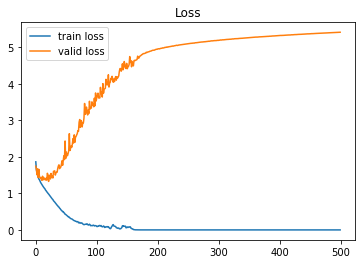

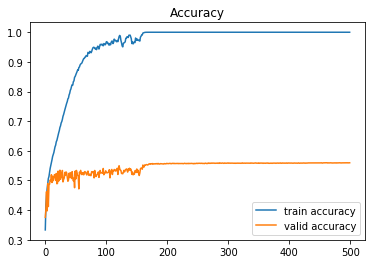

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()